In [ ]:
import nltk
from gensim import corpora
from gensim.models import LdaModel, LsiModel, HdpModel
from gensim.models.coherencemodel import CoherenceModel

import pandas as pd
from nltk.corpus import stopwords
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer

import random
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_md
# !pip install wikipedia-api

# !pip install scispacy
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz
# pip install tensorflow-datasets

In [ ]:
import wikipediaapi
import spacy

# import scispacy
# import tensorflow_datasets as tfds

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

In [ ]:
# Initializing the Wikipedia API
wiki_wiki = wikipediaapi.Wikipedia('MyProjectName (merlin@example.com)', 'en')

# List of titles for which to extract content
titles = [
    "Politics",
    "Neurodegenerative diseases",
    "Financial Derivatives",
    "Quantum Mechanics",
    "Oscars",
    "Deep Sea Creatures",
    "Greek Mythology",
    "French Revolution",
    "Glaciers",
    "Artificial Intelligence"
]

# Function to extract the content of each page
def get_wikipedia_content(title):
    page = wiki_wiki.page(title)
    if page.exists():
        return page.text
    else:
        print(f"Page '{title}' does not exist.")
        return None

corpus = {}
for title in titles:
    content = get_wikipedia_content(title)
    if content:
        corpus[title] = content

for title, content in corpus.items():
    print(f"Title: {title}\nContent snippet:\n{content[:500]}...\n")


#Sample AI Medical Corpus
# corpus = {
#     "Topic-1": """
#    Atherosclerosis is a chronic inflammatory condition characterized by the accumulation of lipids, cholesterol, and fibrous elements within the arterial wall. This process leads to plaque formation and vascular calcification, eventually causing ischemia in organs like the myocardium and brain. The severity of atherosclerotic lesions can lead to thrombus formation, increasing the risk of acute myocardial infarction and cerebrovascular accidents. Risk factors such as hypercholesterolemia, hypertension, and hyperglycemia exacerbate endothelial dysfunction, promoting vascular remodeling and luminal stenosis.
#     ""","Topic-2":
#     """
#     Neurodegenerative diseases like Alzheimer’s disease and Parkinson’s disease are marked by progressive loss of neurons and synaptic dysfunction, leading to cognitive and motor impairments. Alzheimer's disease is characterized by amyloid plaques and neurofibrillary tangles composed of hyperphosphorylated tau protein. Meanwhile, Parkinson's disease involves the degeneration of dopaminergic neurons in the substantia nigra and the presence of Lewy bodies, which consist of aggregated alpha-synuclein protein. The buildup of neurotoxic proteins disrupts synaptic plasticity and neurogenesis, leading to synaptic pruning and eventually neuronal apoptosis.
#     ""","Topic-3":
#     """
#     Carcinogenesis is a multi-stage process involving genetic mutations, epigenetic alterations, and microenvironmental changes that transform normal cells into malignant ones. Cancer progression typically involves tumor initiation, promotion, and progression phases, often influenced by oncogenes and tumor suppressor genes. The hallmarks of cancer include uncontrolled cellular proliferation, resistance to apoptosis, sustained angiogenesis, and the ability to metastasize. Techniques like immunohistochemistry and molecular profiling are used to identify biomarkers for targeted therapies, which can specifically inhibit tyrosine kinases and other signaling pathways in neoplastic cells.
#     ""","Topic-4":
#     """Chronic obstructive pulmonary disease (COPD) is a respiratory disorder characterized by persistent airflow limitation and inflammation of the airways. COPD often includes conditions such as chronic bronchitis and emphysema, where there is a breakdown of alveolar walls and loss of lung elasticity. Pulmonary function tests measuring forced expiratory volume (FEV) and vital capacity (VC) help in diagnosing and assessing the severity of the disease. Treatments like bronchodilators, corticosteroids, and oxygen therapy are essential in managing exacerbations and improving patients' quality of life. Advanced cases may require mechanical ventilation or lung transplantation.
#     ""","Topic-5":
#     """Inflammatory bowel disease (IBD), encompassing Crohn's disease and ulcerative colitis, involves chronic inflammation of the gastrointestinal tract. In Crohn’s disease, inflammation can occur along any part of the GI tract but frequently affects the ileum and colon. Conversely, ulcerative colitis primarily affects the colonic mucosa. Hepatobiliary complications like cholangitis and hepatic steatosis are common in IBD patients due to disrupted bile metabolism. Diagnostic modalities include colonoscopy with biopsy, and treatments involve immunomodulators, corticosteroids, and biologic agents targeting TNF-alpha and integrins to reduce inflammatory processes.
#     """
# }


Title: Politics
Content snippet:
Politics (from Ancient Greek  πολιτικά (politiká) 'affairs of the cities') is the set of activities that are associated with making decisions in groups, or other forms of power relations among individuals, such as the distribution of status or resources.
The branch of social science that studies politics and government is referred to as political science.
Politics may be used positively in the context of a "political solution" which is compromising and non-violent, or descriptively as "the art o...

Title: Neurodegenerative diseases
Content snippet:
A neurodegenerative disease is caused by the progressive loss of neurons, in the process known as neurodegeneration. Neuronal damage may also ultimately result in their death. Neurodegenerative diseases include amyotrophic lateral sclerosis, multiple sclerosis, Parkinson's disease, Alzheimer's disease, Huntington's disease, multiple system atrophy, tauopathies, and prion diseases. Neurodegeneration can be fo

In [ ]:
# Defining a preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

# Preprocess a subset and store results
preprocessed_texts = []
for i, data_item in enumerate(corpus):  # Process first 5 articles as a subset
    # Access the text using the title as the key in the corpus dictionary
    text = corpus[data_item]
    preprocessed_text = preprocess_text(text)
    preprocessed_texts.append(preprocessed_text)
    print(f"Preprocessed Article {i+1}:\n{preprocessed_text[:300]}...\n")

Preprocessed Article 1:
politics ancient greek politik affairs cities set activities associated making decisions groups forms power relations among individuals distribution status resources branch social science studies politics government referred political science politics may used positively context political solution c...

Preprocessed Article 2:
neurodegenerative disease caused progressive loss neurons process known neurodegeneration neuronal damage may also ultimately result death neurodegenerative diseases include amyotrophic lateral sclerosis multiple sclerosis parkinsons disease alzheimers disease huntingtons disease multiple system atr...

Preprocessed Article 3:
finance derivative contract derives value performance underlying entity underlying entity asset index currency interest rate often simply called underlying derivatives used number purposes including insuring price movements hedging increasing exposure price movements speculation getting access other...

Preprocessed 

In [ ]:
def preprocess(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

processed_corpus = [preprocess(doc) for doc in preprocessed_texts]

# Creating a dictionary and corpus for LDA, LSI, and HDP
dictionary = corpora.Dictionary(processed_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_corpus]

In [ ]:
import spacy
from collections import Counter
import nltk
from nltk.corpus import stopwords

nlp = spacy.load("en_core_web_md")

texts = [corpus[title] for title in corpus]

# Preprocess the text: Tokenize and extract terms (nouns, proper nouns)
def extract_terms(texts):
    stop_words = set(stopwords.words('english'))
    all_terms = []

    for text in texts:
        doc = nlp(text.lower())
        terms = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN'] and token.text not in stop_words]
        all_terms.extend(terms)

    return all_terms

all_terms = extract_terms(texts)

# Creating a frequency distribution of the terms (reference vocabulary)
term_frequency = Counter(all_terms)


filtered_terms = Counter({term: count for term, count in term_frequency.items() if count > 5})

common_terms = filtered_terms.most_common(20)
print("Most common terms:", common_terms)

# Reference vocabulary
reference_vocab = set(filtered_terms.keys())
print(f"Generated Reference Vocabulary ({len(reference_vocab)} terms):", reference_vocab)

# reference_vocab = {
#     'endothelial dysfunction', 'targeted therapies', 'cellular proliferation', 'cancer',
#     'lung transplantation', 'FEV', 'myocardium', 'TNF-alpha', 'biomarkers', 'respiratory disorder',
#     'chronic inflammatory condition', 'bronchodilators', 'Atherosclerosis', 'synaptic plasticity',
#     'Alzheimer’s disease', 'amyloid', 'dopaminergic', 'Carcinogenesis', 'atherosclerotic lesions',
#     'genetic mutations', 'chronic inflammation', 'Neurodegenerative diseases', 'Inflammatory bowel disease',
#     'substantia nigra', 'hypercholesterolemia', "Crohn's disease", 'ischemia', 'chronic bronchitis',
#     'angiogenesis', 'synaptic dysfunction', 'forced expiratory volume', 'motor impairments',
#     'Hepatobiliary complications', 'apoptosis', 'colonoscopy', 'microenvironmental', 'brain',
#     "Alzheimer's disease", 'Pulmonary function tests', 'arterial wall', 'signaling pathways',
#     'COPD', 'metastasize', 'neoplastic cells', 'tumor suppressor genes', 'hyperphosphorylated',
#     'alpha-synuclein protein', 'tau protein', 'neurotoxic proteins', 'molecular profiling',
#     'sustained angiogenesis', 'inflammation', 'normal cells', 'vascular calcification',
#     'neurons', 'vascular remodeling', 'ulcerative colitis', 'neurofibrillary', 'epigenetic alterations',
#     'biologic agents', 'luminal stenosis', 'malignant', 'hypertension', 'hepatic steatosis',
#     'Chronic obstructive pulmonary disease', 'alveolar walls', 'vital capacity', 'immunohistochemistry',
#     'bile metabolism', 'exacerbations'
# }

Most common terms: [('academy', 171), ('quantum', 151), ('\\displaystyle', 136), ('ice', 131), ('awards', 130), ('derivatives', 111), ('time', 100), ('ai', 99), ('revolution', 95), ('system', 94), ('state', 93), ('glacier', 92), ('glaciers', 91), ('disease', 88), ('intelligence', 82), ('contract', 80), ('price', 80), ('risk', 79), ('%', 78), ('award', 75)]
Generated Reference Vocabulary (1125 terms): {'number', 'definition', 'length', 'cult', 'nobility', 'clubs', 'parkinson', 'television', 'bias', 'politics', 'center', 'layers', 'ideas', 'swap', 'valleys', 'commitment', 'ceremonies', 'de', 'calendar', 'situations', 'country', 'armies', 'council', 'regions', 'season', 'function', 'loans', 'intelligence', 'court', 'electron', 'software', 'love', 'c.', 'security', 'ice', 'age', 'identification', 'industry', 'gods', 'colonies', 'river', 'past', 'nomination', 'value', 'sans', 'parlements', 'greece', 'affairs', 'documentary', 'cases', 'ψ', 'theogony', 'signals', 'account', 'derivative', 'mus

<ipython-input-10-ddbc22d22987>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


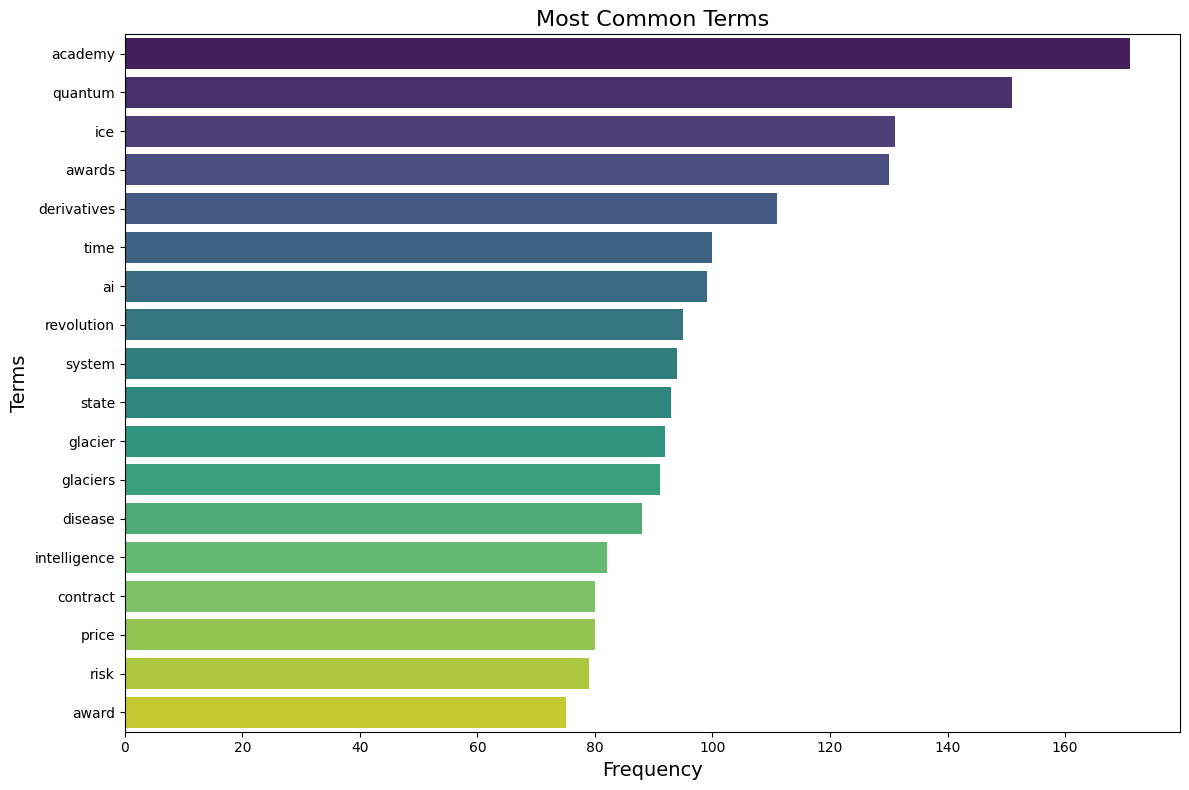

In [ ]:
# Most common terms and their frequencies
common_terms.pop(2)
common_terms.pop(-2)
terms = common_terms

words, frequencies = zip(*terms)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=frequencies, y=words, palette='viridis')

plt.title('Most Common Terms', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Terms', fontsize=14)

plt.tight_layout()

plt.show()


In [ ]:
from gensim.models import LdaModel, LsiModel, HdpModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import jaccard_score

nlp = spacy.load("en_core_web_md")

def extract_terms_spacy(corpus):
    extracted_terms = []
    for doc in nlp.pipe(corpus):
        terms = set([token.text.lower() for token in doc if token.pos_ in ["NOUN", "PROPN"] or token.ent_type_])
        extracted_terms.append(list(terms))
    return extracted_terms

processed_corpus_spacy = extract_terms_spacy(preprocessed_texts)

# Function to train models and compute coherence scores
def train_models(doc_term_matrix, dictionary, processed_corpus, processed_corpus_spacy, reference_vocab):
    num_topics = 20  #  can be adjust this
    models = {}
    coherence_scores = {}

    # LDA
    lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=20)
    models['LDA'] = lda_model

    # Calculating Coherence Scores (c_v)
    coherence_lda_c_v = CoherenceModel(model=lda_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

    coherence_scores['LDA'] = {
        'c_v': coherence_lda_c_v

    }

    # LSI
    lsi_model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
    models['LSI'] = lsi_model

    # Calculating Coherence Scores for LSI
    coherence_lsi_c_v = CoherenceModel(model=lsi_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

    coherence_scores['LSI'] = {
        'c_v': coherence_lsi_c_v

    }

    # HDP
    hdp_model = HdpModel(doc_term_matrix, id2word=dictionary)
    models['HDP'] = hdp_model

    # Calculating Coherence Scores for HDP
    coherence_hdp_c_v = CoherenceModel(model=hdp_model, texts=processed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()


    coherence_scores['HDP'] = {
        'c_v': coherence_hdp_c_v
    }

    # Evaluating interpretability and completeness
    interpretability_scores = {}
    completeness_scores = {}

    for model_name, model in models.items():
        topic_terms = [term[0] for topic in model.show_topics(num_topics=num_topics, formatted=False) for term in topic[1]]

        # Overlap with reference vocabulary for interpretability
        overlap_terms = set(topic_terms).intersection(reference_vocab)
        interpretability_scores[model_name] = len(overlap_terms) / len(topic_terms) if topic_terms else 0

        # Jaccard similarity as a measure of completeness
        completeness_scores[model_name] = jaccard_score(
            np.array([1 if term in reference_vocab else 0 for term in topic_terms]),
            np.array([1 if term in processed_corpus_spacy else 0 for term in topic_terms]),
            average='macro'
        )

    coherence_scores['LDA'].update({'interpretability': interpretability_scores['LDA'], 'completeness': completeness_scores['LDA']})
    coherence_scores['LSI'].update({'interpretability': interpretability_scores['LSI'], 'completeness': completeness_scores['LSI']})
    coherence_scores['HDP'].update({'interpretability': interpretability_scores['HDP'], 'completeness': completeness_scores['HDP']})

    return models, coherence_scores

models, coherence_scores = train_models(doc_term_matrix, dictionary, processed_corpus, processed_corpus_spacy, reference_vocab)

print("Coherence Scores:")
for model_name, score_dict in coherence_scores.items():
    print(f"{model_name}:")
    for coherence_type, score in score_dict.items():
        print(f"  {coherence_type}: {score}")

# Visualization of coherence scores for each model
coherence_types = ['c_v']
model_names = ['LDA', 'LSI', 'HDP']

coherence_data = {coherence_type: [] for coherence_type in coherence_types}

for model_name in model_names:
    for coherence_type in coherence_types:
        coherence_data[coherence_type].append(coherence_scores[model_name].get(coherence_type, 0))


Coherence Scores:
LDA:
  c_v: 0.519980020162058
  interpretability: 0.36
  completeness: 0.145
LSI:
  c_v: 0.6189935865023546
  interpretability: 0.6
  completeness: 0.095
HDP:
  c_v: 0.7870222789166771
  interpretability: 0.4075
  completeness: 0.27625


<ipython-input-13-e8c95b1e19b6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(coherence_scores.keys()), y=c_v_scores, palette='Blues_d')


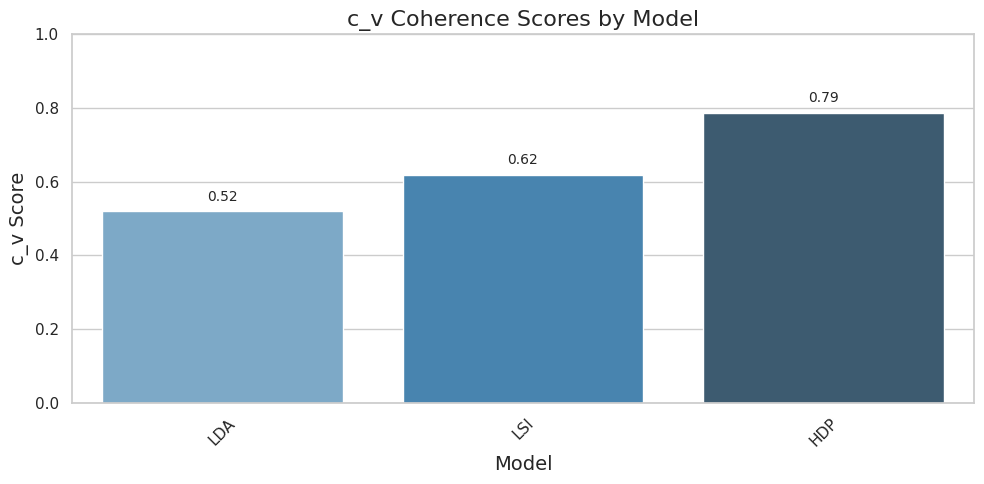

<ipython-input-13-e8c95b1e19b6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(coherence_scores.keys()), y=interpretability_scores_list, palette='Greens_d')


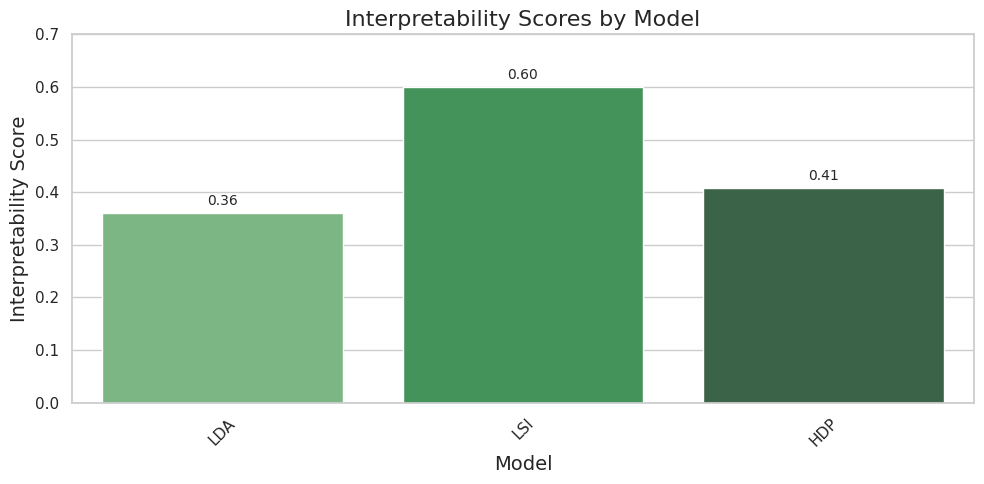

<ipython-input-13-e8c95b1e19b6>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(coherence_scores.keys()), y=completeness_scores_list, palette='Reds_d')


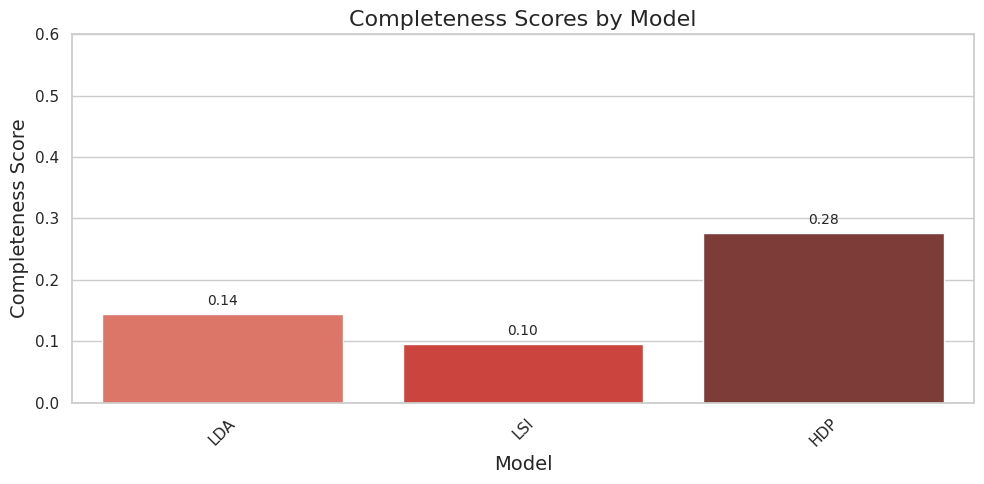

In [ ]:
sns.set(style="whitegrid")

c_v_scores = [coherence_scores[model]['c_v'] for model in coherence_scores]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(coherence_scores.keys()), y=c_v_scores, palette='Blues_d')
plt.title('c_v Coherence Scores by Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('c_v Score', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, score in enumerate(c_v_scores):
    ax.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

interpretability_scores_list = [coherence_scores[model]['interpretability'] for model in coherence_scores]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(coherence_scores.keys()), y=interpretability_scores_list, palette='Greens_d')
plt.title('Interpretability Scores by Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Interpretability Score', fontsize=14)
plt.ylim(0, 0.7)
plt.xticks(rotation=45)

for i, score in enumerate(interpretability_scores_list):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

completeness_scores_list = [coherence_scores[model]['completeness'] for model in coherence_scores]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(coherence_scores.keys()), y=completeness_scores_list, palette='Reds_d')
plt.title('Completeness Scores by Model', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Completeness Score', fontsize=14)
plt.ylim(0, 0.6)
plt.xticks(rotation=45)

for i, score in enumerate(completeness_scores_list):
    ax.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
def extract_terms(models, num_terms=5):
    terms = {}
    for model_name, model in models.items():
        terms[model_name] = []
        # Get the number of topics differently for HDP model
        num_topics = model.get_topics().shape[0] if model_name == 'HDP' else model.num_topics
        for topic_id in range(num_topics):
            terms_list = model.show_topic(topic_id, topn=num_terms)
            terms[model_name].append([word for word, _ in terms_list])
    return terms

extracted_terms = extract_terms(models)
print("\nExtracted Terms:")
for model, topics in extracted_terms.items():
    print(f"{model}: {topics}")


Extracted Terms:
LDA: [['ai', 'used', 'learning', 'may', 'data'], ['political', 'derivatives', 'disease', 'may', 'many'], ['ai', 'intelligence', 'learning', 'artificial', 'used'], ['ai', 'academy', 'quantum', 'displaystyle', 'awards'], ['ai', 'also', 'may', 'first', 'political'], ['academy', 'awards', 'also', 'quantum', 'award'], ['quantum', 'displaystyle', 'mechanics', 'theory', 'x'], ['political', 'academy', 'awards', 'greek', 'revolution'], ['derivatives', 'contract', 'price', 'market', 'risk'], ['zone', 'deep', 'sea', 'water', 'pressure'], ['ice', 'glacier', 'glaciers', 'glacial', 'water'], ['political', 'quantum', 'system', 'states', 'state'], ['greek', 'gods', 'mythology', 'myths', 'myth'], ['displaystyle', 'quantum', 'mechanics', 'psi', 'theory'], ['ai', 'also', 'ice', 'political', 'glaciers'], ['academy', 'awards', 'revolution', 'french', 'best'], ['disease', 'neurodegenerative', 'diseases', 'protein', 'alzheimers'], ['political', 'politics', 'state', 'states', 'democracy'], [

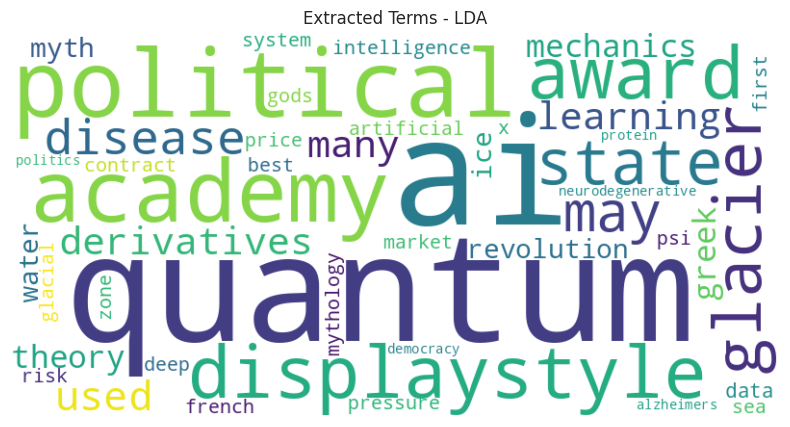

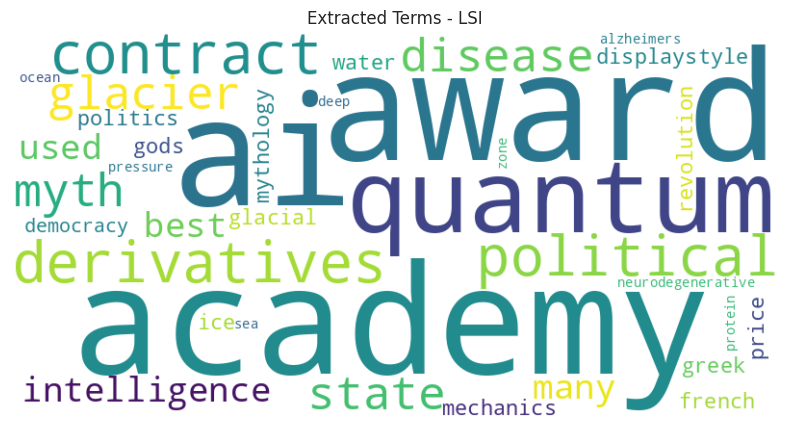

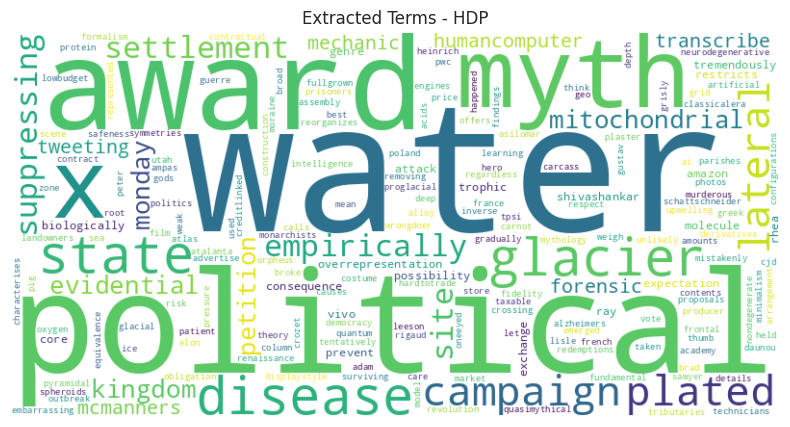

In [ ]:
from wordcloud import WordCloud

def visualize_extracted_terms(extracted_terms):
    """
    Visualizes extracted terms using word clouds for each model.

    Args:
        extracted_terms (dict): A dictionary where keys are model names and values are lists of extracted terms.
    """

    for model_name, terms in extracted_terms.items():
        all_terms = " ".join([term for sublist in terms for term in sublist])

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_terms)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Extracted Terms - {model_name}")
        plt.show()

visualize_extracted_terms(extracted_terms)

In [ ]:
from scipy.spatial.distance import cdist

# Pre-compute vectors for the reference vocabulary
reference_vectors = {term: nlp(term).vector for term in reference_vocab if isinstance(term, str) and term in nlp.vocab.strings}
reference_matrix = np.array([vec for vec in reference_vectors.values() if np.any(vec)])  # Filter out zero vectors
reference_terms = list(reference_vectors.keys())

def calculate_semantic_similarity(extracted_terms, reference_matrix):
    similarity_scores = {}

    for model_name, topics in extracted_terms.items():
        all_terms = [term for topic in topics for term in topic]
        similarities = []

        # Pre-compute vectors for extracted terms
        extracted_vectors = {term: nlp(term).vector for term in all_terms if isinstance(term, str) and term in nlp.vocab.strings}
        extracted_matrix = np.array([vec for vec in extracted_vectors.values() if np.any(vec)])  # Filter out zero vectors

        if extracted_matrix.size > 0:
            # Calculate cosine similarity between extracted terms and reference vocabulary in a vectorized way
            sim_matrix = 1 - cdist(extracted_matrix, reference_matrix, metric='cosine')

            # Take the mean of the maximum similarity for each term
            max_similarities = np.max(sim_matrix, axis=1)
            similarities = max_similarities

        # Average similarity score for each model
        similarity_scores[model_name] = np.mean(similarities) if similarities.size > 0 else 0

    return similarity_scores

similarity_scores = calculate_semantic_similarity(extracted_terms, reference_matrix)
print("Similarity score: ", similarity_scores)


Similarity score:  {'LDA': 0.9115587810401982, 'LSI': 0.9282791145860877, 'HDP': 0.7279614148237487}


In [ ]:
import numpy as np
from gensim.models import LdaModel, LsiModel, HdpModel
from collections import Counter

# Function to calculate diversity score
def calculate_diversity_score(extracted_terms):
    diversity_scores = {}
    for model_name, topics in extracted_terms.items():
        # Flatten the list of topics into a single list of terms
        all_terms = [term for topic in topics for term in topic]

        unique_terms = len(set(all_terms))
        total_terms = len(all_terms)

        # Shannon entropy based diversity score
        term_counts = Counter(all_terms)
        probabilities = [count / total_terms for count in term_counts.values()]

        # Shannon entropy calculation for diversity
        entropy = -sum(p * np.log(p) for p in probabilities if p > 0)

        diversity_scores[model_name] = entropy
    return diversity_scores

# Function to calculate stability score using Jaccard similarity
def calculate_stability(doc_term_matrix, dictionary, model_type='LDA', num_runs=3, num_topics=6):
    stability_scores = []

    for _ in range(num_runs):
        model = None
        if model_type == 'LDA':
            model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)
        elif model_type == 'LSI':
            model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        elif model_type == 'HDP':
            model = HdpModel(doc_term_matrix, id2word=dictionary)

        if model:
            # Get top N terms (in this case, top 10 terms for the first topic)
            terms = [term for term, _ in model.show_topic(0, topn=10)]
            stability_scores.append(set(terms))

    # Calculate stability as the average Jaccard similarity across runs
    jaccard_sims = []
    for i in range(len(stability_scores)):
        for j in range(i + 1, len(stability_scores)):
            intersection = len(stability_scores[i].intersection(stability_scores[j]))
            union = len(stability_scores[i].union(stability_scores[j]))
            jaccard_sims.append(intersection / union if union > 0 else 0)

    return np.mean(jaccard_sims) if jaccard_sims else 0


diversity_scores = calculate_diversity_score(extracted_terms)
stability_scores = {model: calculate_stability(doc_term_matrix, dictionary, model_type=model) for model in extracted_terms.keys()}

print("Diversity scores: ", diversity_scores)
print("Stability scores: ", stability_scores)


Diversity scores:  {'LDA': 3.7124873340056315, 'LSI': 3.641560094675983, 'HDP': 6.57571178697445}
Stability scores:  {'LDA': 0.07407407407407407, 'LSI': 1.0, 'HDP': 0.4444444444444444}


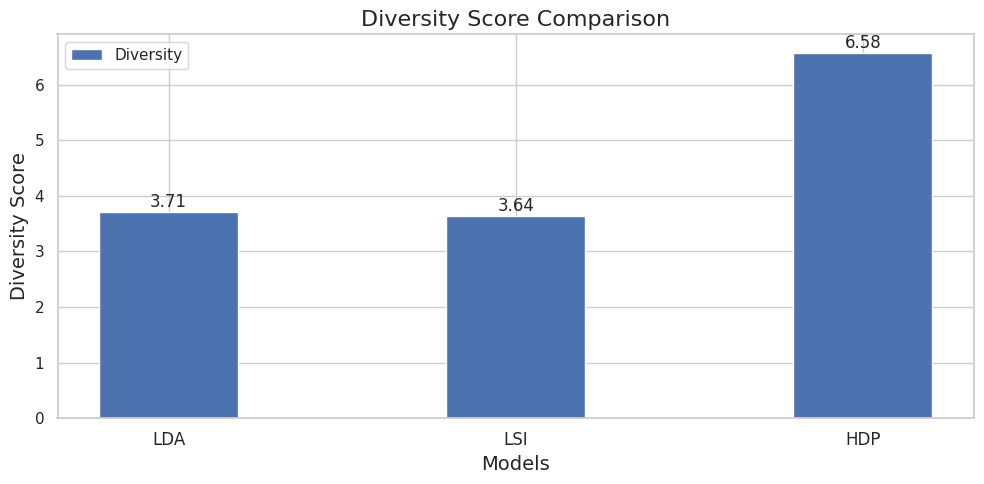

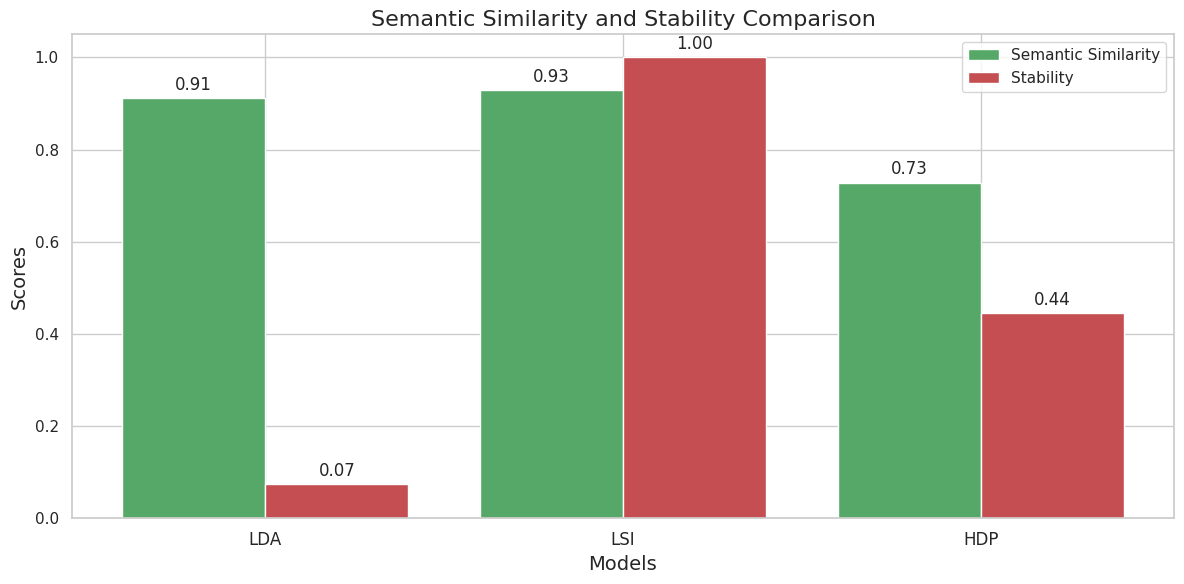

In [ ]:
# Collate scores
labels = list(coherence_scores.keys())
diversity_vals = [diversity_scores[model] for model in labels]
similarity_vals = [similarity_scores[model] for model in labels]
stability_vals = [stability_scores[model] for model in labels]

x = np.arange(len(labels))
width = 0.4  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, diversity_vals, width, label='Diversity', color='b')

ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Diversity Score', fontsize=14)
ax.set_title('Diversity Score Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(loc='best')

for i in range(len(labels)):
    ax.text(i, diversity_vals[i] + 0.01, f'{diversity_vals[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot visualization
ax.bar(x - width/2, similarity_vals, width, label='Semantic Similarity', color='g')
ax.bar(x + width/2, stability_vals, width, label='Stability', color='r')

ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Semantic Similarity and Stability Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(loc='best')

for i in range(len(labels)):
    ax.text(i - width/2, similarity_vals[i] + 0.01, f'{similarity_vals[i]:.2f}', ha='center', va='bottom')
    ax.text(i + width/2, stability_vals[i] + 0.01, f'{stability_vals[i]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
